In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
# Set the paths for train and validation data
train_data_dir = 'D:\\Project\\Dataset\\new\\train'
validation_data_dir = 'D:\\Project\\Dataset\\new\\valid'


In [3]:

# Define image dimensions and other parameters
img_width, img_height = 299, 299  # Adjusted for InceptionV3
batch_size = 32
epochs = 100
num_classes = 6

In [4]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Only rescaling for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Loading training and validation data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,)
        

Found 9409 images belonging to 6 classes.
Found 2853 images belonging to 6 classes.


In [6]:

# Load the InceptionV3 model with pre-trained weights (exclude the top layer)
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base Inception model
for layer in inception_base.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [7]:

# Adding custom classification layers on top of InceptionV3
model = Sequential()
model.add(inception_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with early stopping
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])


Epoch 1/100


c:\Users\sarve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 730s 2s/step - accuracy: 0.7527 - loss: 11.0527 - val_accuracy: 0.9274 - val_loss: 0.6030
Epoch 2/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.9433 - loss: 0.4040 - val_accuracy: 0.9373 - val_loss: 0.3447
Epoch 3/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.9729 - loss: 0.1479 - val_accuracy: 0.9607 - val_loss: 0.1678
Epoch 4/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.9734 - loss: 0.1366 - val_accuracy: 0.9590 - val_loss: 0.2105
Epoch 5/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9726 - loss: 0.1393 - val_accuracy: 0.9408 - val_loss: 0.2595
Epoch 6/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - accuracy: 0.9733 - loss: 0.1357 - val_accuracy: 0.9727 - val_loss: 0.1428
Epoch 7/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.9838 - loss: 0.0710 - val_accuracy: 0.9832 - val_loss: 0.0681
Epoch 8/100
295/295 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.9869 - loss: 0.0489 - val_accurac

In [10]:

# Save the trained model
model.save('D:\\Project\\Code\\Models\\InceptionV3_32B_10E1_model.keras')
print("Model saved successfully.")

# Evaluate the model
validation_accuracy = model.evaluate(validation_generator)
print("Validation Accuracy:", validation_accuracy[1])


Model saved successfully.
90/90 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9889 - loss: 0.0464
Validation Accuracy: 0.9852786660194397


In [11]:
# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


90/90 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step
Confusion Matrix
[[98 81 79 90 79 77]
 [91 89 77 82 90 68]
 [74 81 79 75 66 65]
 [80 91 66 89 82 94]
 [89 68 77 71 75 74]
 [82 80 62 84 73 75]]
Classification Report
                                   precision    recall  f1-score   support

               Apple___Apple_scab       0.19      0.19      0.19       504
                Apple___Black_rot       0.18      0.18      0.18       497
         Apple___Cedar_apple_rust       0.18      0.18      0.18       440
                  Apple___healthy       0.18      0.18      0.18       502
              Blueberry___healthy       0.16      0.17      0.16       454
Cherry_(including_sour)___healthy       0.17      0.16      0.17       456

                         accuracy                           0.18      2853
                        macro avg       0.18      0.18      0.18      2853
                     weighted avg       0.18      0.18      0.18      2853



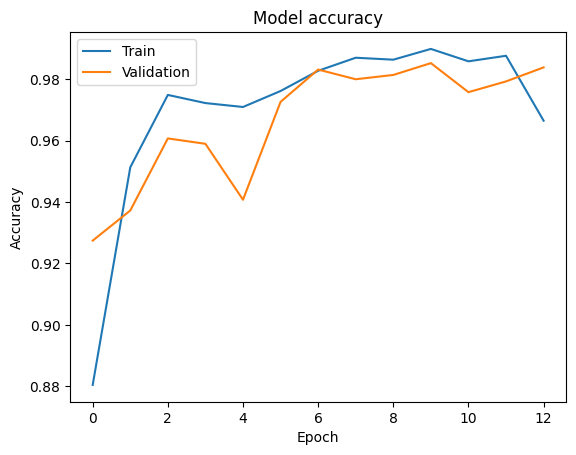

: 

In [12]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()